In [2]:
import pandas as pd 
amazon = pd.read_csv('amazon_co-ecommerce_sample.csv')
print(amazon.head(5), amazon.shape)

                            uniq_id  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        product_name manufacturer   price  \
0                              Hornby 2014 Catalogue       Hornby   £3.42   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys  £16.99   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   £9.99   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby  £39.99   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby  £32.19   

  number_available_in_stock number_of_reviews  number_of_answered_questions  \
0                     5 new                15                           1.0   
1                       NaN                 2                           1.0   
2                     2 new                17                    

In [3]:
print(amazon.columns.values)

['uniq_id' 'product_name' 'manufacturer' 'price'
 'number_available_in_stock' 'number_of_reviews'
 'number_of_answered_questions' 'average_review_rating'
 'amazon_category_and_sub_category'
 'customers_who_bought_this_item_also_bought' 'description'
 'product_information' 'product_description'
 'items_customers_buy_after_viewing_this_item'
 'customer_questions_and_answers' 'customer_reviews' 'sellers']


In [4]:
usingCols=amazon
usingCols.drop(['uniq_id', 'number_available_in_stock', 
                'customers_who_bought_this_item_also_bought', 'items_customers_buy_after_viewing_this_item',
               'customer_questions_and_answers', 'sellers'], axis=1, inplace=True)
print(usingCols.columns.values)

['product_name' 'manufacturer' 'price' 'number_of_reviews'
 'number_of_answered_questions' 'average_review_rating'
 'amazon_category_and_sub_category' 'description' 'product_information'
 'product_description' 'customer_reviews']


In [5]:
print(usingCols.shape)
usingCols.dropna(thresh=usingCols.shape[0]*0.6,how='all',axis=1)
print(usingCols.shape)

(10000, 11)
(10000, 11)


In [6]:
print(usingCols.shape)
usingCols = usingCols[usingCols['average_review_rating'].notna()]
usingCols = usingCols[usingCols['product_name'].notna()]
usingCols = usingCols[usingCols['price'].notna()]
print(usingCols.shape)

(10000, 11)
(8550, 11)


In [7]:
usingCols.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,I love it // 5.0 // 22 July 2013 // By\n \n...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,Birthday present // 5.0 // 14 April 2014 // By...


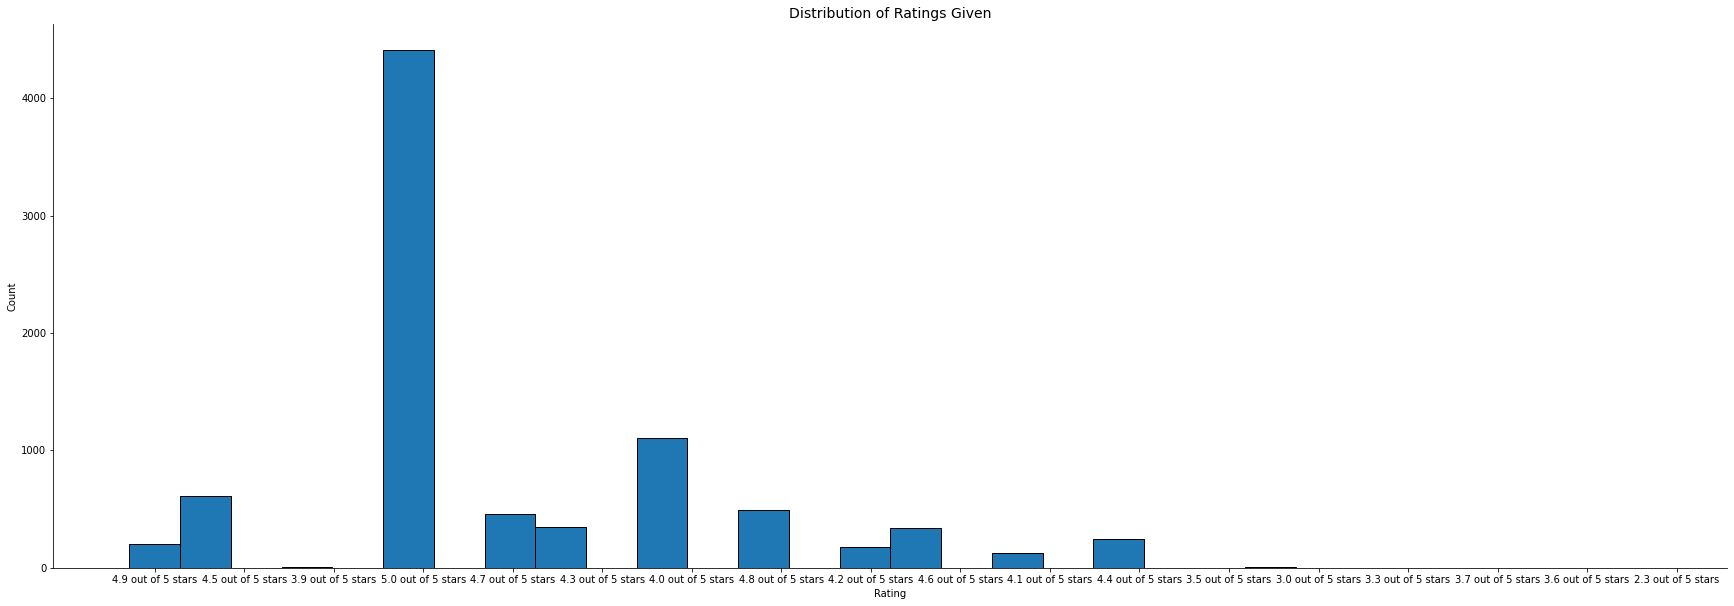

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30,10))
plt.hist(usingCols.average_review_rating, align='left', bins=30, edgecolor='k')
sns.despine()
plt.title('Distribution of Ratings Given', fontsize=14)
plt.xlabel('Rating', fontsize=10), plt.ylabel('Count', fontsize=10)
plt.show()

In [9]:
usingCols['customer_reviews'] = usingCols['customer_reviews'].astype(str)

In [10]:
from textblob import TextBlob
def polar(x):
    return TextBlob(x).sentiment.polarity
usingCols['sentiment'] = usingCols.customer_reviews.apply(polar)
usingCols.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment
0,Hornby 2014 Catalogue,Hornby,£3.42,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,Worth Buying For The Pictures Alone (As Ever) ...,0.361293
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,0.900000
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,0.254530
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,I love it // 5.0 // 22 July 2013 // By\n \n...,0.500000
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,Birthday present // 5.0 // 14 April 2014 // By...,0.293125


In [11]:
five = usingCols[usingCols.average_review_rating == 5]
four = usingCols[usingCols.average_review_rating == 4]
three = usingCols[usingCols.average_review_rating == 3]
two = usingCols[usingCols.average_review_rating == 2]
one = usingCols[usingCols.average_review_rating == 1]

sortSentiment = usingCols.sort_values(by= ['sentiment'], ascending=False)
sortSentiment = sortSentiment.reset_index()
sortSentiment = sortSentiment.drop(['index'], axis=1)
sortSentiment

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment
0,Disney The Good Dinosaur Spot and Lizard Actio...,Disney,£4.29,1,1.0,5.0 out of 5 stars,Characters & Brands > Disney > Toys,Product Description What if the asteroid that ...,Technical Details Item Weight50 g Product Dime...,Product Description What if the asteroid that ...,Five Stars // 5.0 // 6 Dec. 2015 // By\n \n...,1.000000
1,Bruce Forsyth - Celebrity Face Mask,TV Stars,£3.29,1,2.0,5.0 out of 5 stars,Fancy Dress > Accessories > Masks,High Quality Card Face Mask You & your friends...,Technical Details Manufacturer recommended age...,High Quality Card Face Mask You & your friends...,Five Stars // 5.0 // 7 Jan. 2016 // By\n \n...,1.000000
2,Oxford Diecast Daimler SP250 [Hood] Black Metr...,Oxford Diecast,£20.97,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,New tooling also brings a superb Daimler sport...,Technical Details Item Weight54 g Product Dime...,New tooling also brings a superb Daimler sport...,Five Stars // 5.0 // 6 Jan. 2016 // By\n \n...,1.000000
3,Call of Cthulhu Horror on the orient express B...,Q-Workshop,£11.95,1,1.0,5.0 out of 5 stars,Games > Dice & Dice Games,Official Dice Set for HORROR ON THE ORIENT EXP...,Technical Details Item Weight59 g Product Dime...,Official Dice Set for HORROR ON THE ORIENT EXP...,Five Stars // 5.0 // 17 Jun. 2015 // By\n \...,1.000000
4,SKYREAT Aluminum Parabolic Antenna Range Boost...,SKYREAT,£14.99,1,19.0,4.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Package include:1* dji phantom 3 &inspire 1 Al...,Technical Details Item Weight9 g Product Dimen...,Package include:1* dji phantom 3 &inspire 1 Al...,Four Stars // 4.0 // 19 Feb. 2016 // By\n \...,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8545,"Star Wars Power of the Force ""Dengar""",Star Wars,£10.44,1,1.0,5.0 out of 5 stars,Characters & Brands > Star Wars > Toys,"Star Wars Power of the Force ""Dengar"" Green Ho...",Technical Details Item Weight45 g Product Dime...,"Star Wars Power of the Force ""Dengar"" Green Ho...",my sad sad collection // 5.0 // 9 Nov. 2010 //...,-0.562500
8546,YuGiOh : YAP1-EN006 Limited Ed Buster Blader U...,Deckboosters,£9.95,1,2.0,4.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Single...,All Deckboosters single cards are brand new in...,Technical Details Manufacturer recommended age...,All Deckboosters single cards are brand new in...,Packaging Issues // 4.0 // 17 Dec. 2013 // By\...,-0.600000
8547,Zombie Dice Bag,Q-Workshop,£8.63,1,1.0,5.0 out of 5 stars,Games > Dice & Dice Games,We have got something special for all fans of ...,Technical Details Item Weight9 g Product Dimen...,We have got something special for all fans of ...,Five Stars // 5.0 // 4 April 2016 // By\n \...,-0.625000
8548,Pokemon Fall 2014 Tin Set Venusaur-EX,Pokémon,£15.49,1,1.0,5.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,STEP UP YOUR GAME with the EX POWER TRIO! Thre...,Technical Details Item Weight23 g Product Dime...,STEP UP YOUR GAME with the EX POWER TRIO! Thre...,Five Stars // 5.0 // 30 Dec. 2015 // By\n \...,-0.714286


In [12]:
fives = sortSentiment[sortSentiment.sentiment > 0.191111111110]
fours = sortSentiment[sortSentiment.sentiment > 0.0833333333332]
fours = fours[fours.sentiment < 0.191111111111111]
threes = sortSentiment[sortSentiment.sentiment > -0.004933333333333339]
threes = threes[threes.sentiment < 0.0833333333332]
twos = sortSentiment[sortSentiment.sentiment > -0.09285714285714286]
twos = twos[twos.sentiment < -0.004933333333333336]
ones = sortSentiment[sortSentiment.sentiment < -0.09285714285714286]


ones['Prediction'] = 1
twos['Prediction'] = 2
threes['Prediction'] = 3
fours['Prediction'] = 4
fives['Prediction'] = 5

/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/4164693162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones['Prediction'] = 1
/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/4164693162.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fives['Prediction'] = 5


In [13]:
new = pd.concat([fives, fours, threes, twos, ones])
print(new)

                                           product_name    manufacturer  \
0     Disney The Good Dinosaur Spot and Lizard Actio...          Disney   
1                   Bruce Forsyth - Celebrity Face Mask        TV Stars   
2     Oxford Diecast Daimler SP250 [Hood] Black Metr...  Oxford Diecast   
3     Call of Cthulhu Horror on the orient express B...      Q-Workshop   
4     SKYREAT Aluminum Parabolic Antenna Range Boost...         SKYREAT   
...                                                 ...             ...   
8545              Star Wars Power of the Force "Dengar"       Star Wars   
8546  YuGiOh : YAP1-EN006 Limited Ed Buster Blader U...    Deckboosters   
8547                                    Zombie Dice Bag      Q-Workshop   
8548              Pokemon Fall 2014 Tin Set Venusaur-EX         Pokémon   
8549                   BIZILI 8 PCS Charcoal Pencil Set          Bizili   

       price number_of_reviews  number_of_answered_questions  \
0      £4.29                 1     

In [14]:
temp = new
temp['Rating'] = temp.average_review_rating.str[:3]
temp.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating
0,Disney The Good Dinosaur Spot and Lizard Actio...,Disney,£4.29,1,1.0,5.0 out of 5 stars,Characters & Brands > Disney > Toys,Product Description What if the asteroid that ...,Technical Details Item Weight50 g Product Dime...,Product Description What if the asteroid that ...,Five Stars // 5.0 // 6 Dec. 2015 // By\n \n...,1.0,5,5.0
1,Bruce Forsyth - Celebrity Face Mask,TV Stars,£3.29,1,2.0,5.0 out of 5 stars,Fancy Dress > Accessories > Masks,High Quality Card Face Mask You & your friends...,Technical Details Manufacturer recommended age...,High Quality Card Face Mask You & your friends...,Five Stars // 5.0 // 7 Jan. 2016 // By\n \n...,1.0,5,5.0
2,Oxford Diecast Daimler SP250 [Hood] Black Metr...,Oxford Diecast,£20.97,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,New tooling also brings a superb Daimler sport...,Technical Details Item Weight54 g Product Dime...,New tooling also brings a superb Daimler sport...,Five Stars // 5.0 // 6 Jan. 2016 // By\n \n...,1.0,5,5.0
3,Call of Cthulhu Horror on the orient express B...,Q-Workshop,£11.95,1,1.0,5.0 out of 5 stars,Games > Dice & Dice Games,Official Dice Set for HORROR ON THE ORIENT EXP...,Technical Details Item Weight59 g Product Dime...,Official Dice Set for HORROR ON THE ORIENT EXP...,Five Stars // 5.0 // 17 Jun. 2015 // By\n \...,1.0,5,5.0
4,SKYREAT Aluminum Parabolic Antenna Range Boost...,SKYREAT,£14.99,1,19.0,4.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Package include:1* dji phantom 3 &inspire 1 Al...,Technical Details Item Weight9 g Product Dimen...,Package include:1* dji phantom 3 &inspire 1 Al...,Four Stars // 4.0 // 19 Feb. 2016 // By\n \...,1.0,5,4.0


In [15]:
temp['Rating'] = temp['Rating'].astype(float)
temp['Rating'] = temp['Rating'].astype(int)
temp['Prediction'] = temp['Prediction'].astype(float)
temp['Prediction'] = temp['Prediction'].astype(int)


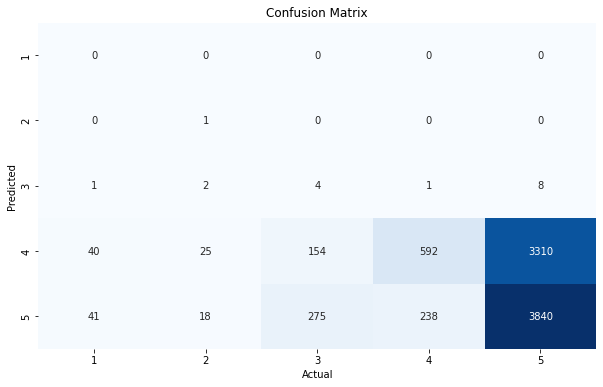

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(temp.Rating, temp.Prediction)
dataframe = pd.DataFrame(matrix, columns=[1,2,3,4,5], index=[1,2,3,4,5])
plt.figure(figsize=(10,6))
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

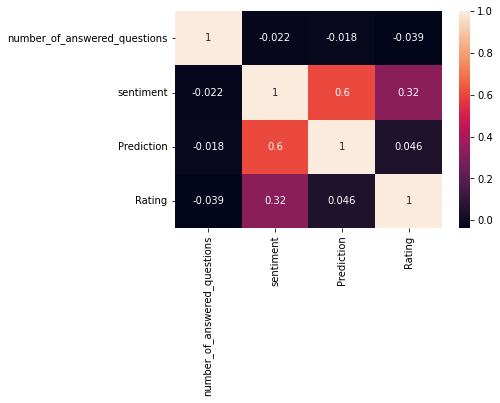

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
print(new.dtypes)

product_name                         object
manufacturer                         object
price                                object
number_of_reviews                    object
number_of_answered_questions        float64
average_review_rating                object
amazon_category_and_sub_category     object
description                          object
product_information                  object
product_description                  object
customer_reviews                     object
sentiment                           float64
Prediction                            int64
Rating                                int64
dtype: object


In [19]:
new['description'] = new['description'].astype(str)

In [20]:
temp.shape

(8550, 14)

In [21]:
new['price'] = new['price'].str[1:]
new.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating
0,Disney The Good Dinosaur Spot and Lizard Actio...,Disney,4.29,1,1.0,5.0 out of 5 stars,Characters & Brands > Disney > Toys,Product Description What if the asteroid that ...,Technical Details Item Weight50 g Product Dime...,Product Description What if the asteroid that ...,Five Stars // 5.0 // 6 Dec. 2015 // By\n \n...,1.0,5,5
1,Bruce Forsyth - Celebrity Face Mask,TV Stars,3.29,1,2.0,5.0 out of 5 stars,Fancy Dress > Accessories > Masks,High Quality Card Face Mask You & your friends...,Technical Details Manufacturer recommended age...,High Quality Card Face Mask You & your friends...,Five Stars // 5.0 // 7 Jan. 2016 // By\n \n...,1.0,5,5
2,Oxford Diecast Daimler SP250 [Hood] Black Metr...,Oxford Diecast,20.97,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,New tooling also brings a superb Daimler sport...,Technical Details Item Weight54 g Product Dime...,New tooling also brings a superb Daimler sport...,Five Stars // 5.0 // 6 Jan. 2016 // By\n \n...,1.0,5,5
3,Call of Cthulhu Horror on the orient express B...,Q-Workshop,11.95,1,1.0,5.0 out of 5 stars,Games > Dice & Dice Games,Official Dice Set for HORROR ON THE ORIENT EXP...,Technical Details Item Weight59 g Product Dime...,Official Dice Set for HORROR ON THE ORIENT EXP...,Five Stars // 5.0 // 17 Jun. 2015 // By\n \...,1.0,5,5
4,SKYREAT Aluminum Parabolic Antenna Range Boost...,SKYREAT,14.99,1,19.0,4.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Package include:1* dji phantom 3 &inspire 1 Al...,Technical Details Item Weight9 g Product Dimen...,Package include:1* dji phantom 3 &inspire 1 Al...,Four Stars // 4.0 // 19 Feb. 2016 // By\n \...,1.0,5,4


In [22]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('plush'))
plush = new.loc[new['check'] > 0]
plush["price"] = plush["price"].astype(float)
print(plush.shape, plush["price"].mean(), plush["Rating"].mean())
plush.head()

(69, 15) 15.97579710144927 4.318840579710145


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/3616114774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plush["price"] = plush["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
1590,GIANTmicrobes Original White Lab Mouse Rat Edu...,White Lab Mouse,6.82,1,2.0,5.0 out of 5 stars,NaN,The white lab mouse is the unsung hero of our ...,Technical Details Manufacturer recommended age...,The white lab mouse is the unsung hero of our ...,Five Stars // 5.0 // 17 Nov. 2014 // By\n \...,0.600000,5,5,1
1607,"Pokemon Pikachu Monster 7"" Plush Doll toy Leaf...",Pokemon pikachu,8.99,1,1.0,5.0 out of 5 stars,NaN,"Pokemon Pikachu Monster 7"" Plush brand new",Technical Details Manufacturer recommended age...,"Pokemon Pikachu Monster 7"" Plush brand new",Great! // 5.0 // 3 Nov. 2015 // By\n \n ...,0.600000,5,5,1
1956,Sanei Animal Crossing : New Leaf Plush Toy - 8...,Sanei,16.99,6,1.0,4.5 out of 5 stars,NaN,This Pokemon Tom Nook plush toy (Tanukichi in ...,Technical Details Item Weight100 g Product Dim...,This Pokemon Tom Nook plush toy (Tanukichi in ...,Great! // 4.0 // 19 Oct. 2014 // By\n \n ...,0.551929,5,4,1
1957,Official Nintendo Super Mario Plush Series Stu...,Toy Zany,15.11,4,1.0,5.0 out of 5 stars,NaN,"This Super Mario plush toy is an official, lic...",Technical Details Item Weight132 g Product Dim...,"This Super Mario plush toy is an official, lic...",It's just beyond adorable! It's so well made a...,0.551875,5,5,2
2108,Frog Hand Puppet,HAPE Beleduc,15.05,2,1.0,5.0 out of 5 stars,Puppets & Puppet Theatres > Hand Puppets,"3 years & up. Jump, Frog, Jump! This soft velo...",Technical Details Item Weight68 g Product Dime...,"3 years & up. Jump, Frog, Jump! This soft velo...",Quality was very good and he has given hours o...,0.538125,5,5,2


In [23]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('soft'))
soft = new.loc[new['check'] > 0]
soft["price"] = soft["price"].astype(float)
print(soft.shape, soft["price"].mean(), soft["Rating"].mean())
soft.head()

(223, 15) 20.716950672645737 4.219730941704036


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/562326134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soft["price"] = soft["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
1418,Steiff 33cm Moritz Teddy Bear (Chestnut),Steiff,139.95,1,1.0,5.0 out of 5 stars,NaN,"Product Description Steiff, Moritz Teddy bear,...",Technical Details Item Weight499 g Product Dim...,"Product Description Steiff, Moritz Teddy bear,...",Teddy moritz // 5.0 // 29 July 2013 // By\n ...,0.631250,5,5,1
1542,Steiff Wittie Owl (White),Steiff,35.71,6,1.0,5.0 out of 5 stars,NaN,"Product Description Steiff, Wittie owl, soft w...",Technical Details Item Weight172 g Product Dim...,"Product Description Steiff, Wittie owl, soft w...",steiff wittie owl // 5.0 // 25 Feb. 2013 // By...,0.604167,5,5,1
1590,GIANTmicrobes Original White Lab Mouse Rat Edu...,White Lab Mouse,6.82,1,2.0,5.0 out of 5 stars,NaN,The white lab mouse is the unsung hero of our ...,Technical Details Manufacturer recommended age...,The white lab mouse is the unsung hero of our ...,Five Stars // 5.0 // 17 Nov. 2014 // By\n \...,0.600000,5,5,1
1920,Star Wars 15 inch Talking Darth Vader Plush,Star Wars,22.99,3,1.0,5.0 out of 5 stars,Characters & Brands > Star Wars > Toys,Product Description Star Wars is an American e...,Technical Details Item Weight998 g Product Dim...,Product Description Star Wars is an American e...,great star wars toy // 5.0 // 15 Jan. 2016 // ...,0.557500,5,5,1
2201,The Puppet Company - Long Sleeves - Lion Hand ...,The Puppet Company,14.99,9,1.0,4.3 out of 5 stars,Puppets & Puppet Theatres > Hand Puppets,Product Description This thirty eight centimet...,Technical Details Item Weight181 g Product Dim...,Product Description This thirty eight centimet...,long lion puppet // 4.0 // 8 Jan. 2011 // By\n...,0.527564,5,4,1


In [24]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('squish'))
mallow = new.loc[new['check'] > 0]
mallow["price"] = mallow["price"].astype(float)
print(mallow.shape, mallow["price"].mean(), mallow["Rating"].mean())
mallow.head()

(4, 15) 14.692499999999999 4.5


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/927454363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mallow["price"] = mallow["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
6584,Cozy Plush Monkey Heatable Soft Toy,Cozy Plush(TM),11.89,29,1.0,4.5 out of 5 stars,NaN,Product Description With the rise in commoditi...,Technical Details Item Weight762 g Product Dim...,Product Description With the rise in commoditi...,A wonderful treat - so warm and smells sweet! ...,0.232433,5,4,1
6612,Transformers Prime Beast Hunters Legion 8cm Fi...,Transformers Prime Beast Hunters,9.95,2,1.0,5.0 out of 5 stars,Characters & Brands > Hasbro,Take those pesky Autobots apart circuit by cir...,Technical Details Item Weight32 g Product Dime...,Take those pesky Autobots apart circuit by cir...,The Best Transformers Legion Toy...EVER! // 5....,0.230257,5,5,1
7464,"66"" Sunset Glow Kids Paddling Swiiming Pool In...",Intex,16.93,36,1.0,4.0 out of 5 stars,Sports Toys & Outdoor > Beach Toys > Paddling ...,This pool will brighten up your garden with it...,Technical Details Item Weight59 g Product Dime...,This pool will brighten up your garden with it...,the world at your fingertips // 5.0 // 16 Mar....,0.162220,4,4,1
7869,Monchhichi Classic Girl (Pink),Monchhichi,20.00,1,4.0,5.0 out of 5 stars,Dolls & Accessories > Soft Dolls,Product Description This Classic Monchhichi gi...,Technical Details Item Weight181 g Product Dim...,Product Description This Classic Monchhichi gi...,Worth The Money // 5.0 // 20 Jan. 2016 // By\n...,0.110635,4,5,1


In [25]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('youtube'))
yt = new.loc[new['check'] > 0]
yt["price"] = yt["price"].astype(float)
print(yt.shape, yt["price"].mean(), yt["Rating"].mean())
yt.head()

(13, 15) 30.812307692307687 4.3076923076923075


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/524832190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yt["price"] = yt["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
2760,HPI E10 Drift RTR with Vaughn Gittin Jr. Monst...,HPI,184.99,2,1.0,5.0 out of 5 stars,Hobbies > Remote Controlled Devices > Parts & ...,"• This is the 1/10 scale Electric Powered, 2.4...",Technical Details Item Weight3.5 Kg Product Di...,"• This is the 1/10 scale Electric Powered, 2.4...",Noice! :) // 5.0 // 2 Sept. 2015 // By\n \n...,0.483226,5,5,1
3379,Qualatex Balloon Pump Hand Air Inflator for Pa...,PAM,4.80,127,NaN,4.7 out of 5 stars,Party Supplies > Decorations > Balloons,A must for all balloon workers! The double act...,Technical Details Item Weight9 g Product Dimen...,A must for all balloon workers! The double act...,Excellent Product // 5.0 // 23 Jun. 2013 // By...,0.432022,5,4,1
4361,Kids crafts Q7S® loom bands kit - 4400 Colour ...,Q7S,10.49,28,NaN,4.9 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,It's all about the bands! Join the craze sweep...,Technical Details Item Weight449 g Product Dim...,It's all about the bands! Join the craze sweep...,Impressed! // 5.0 // 9 Mar. 2015 // By\n \n...,0.365104,5,4,1
4890,"Royal Loom Band Kit, 600 Rainbow Loom Bandz + ...",Royal Loom,3.49,25,NaN,4.2 out of 5 stars,Arts & Crafts > Children's Craft Kits > Bead A...,The Royal Loom Kit has it all . Allowing for h...,Technical Details Item Weight204 g Product Dim...,The Royal Loom Kit has it all . Allowing for h...,Great // 5.0 // 5 Jan. 2014 // By\n \n R...,0.331268,5,4,1
5765,Funskool Preschool Nesting Eggs,Funskool,5.99,30,2.0,4.8 out of 5 stars,"Baby & Toddler Toys > Sorting, Stacking & Plug...",Product Description 5 Colourful nesting eggs. ...,Technical Details Item Weight240 g Product Dim...,Product Description 5 Colourful nesting eggs. ...,What's inside?? // 5.0 // 19 Sept. 2015 // By\...,0.280346,5,4,1


In [26]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('video'))
vid = new.loc[new['check'] > 0]
vid["price"] = vid["price"].astype(float)
print(vid.shape, vid["price"].mean(), vid["Rating"].mean())
vid.head()

(71, 15) 38.18985915492957 4.211267605633803


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/2797786248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vid["price"] = vid["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
1061,Crayola Colour Alive Disney Barbie 16 Pages Co...,Crayola,6.99,1,2.0,5.0 out of 5 stars,Characters & Brands > Disney > Toys,Colour Name:Barbies Set Description: The Crayo...,Technical Details Manufacturer recommended age...,Colour Name:Barbies Set Description: The Crayo...,Five Stars // 5.0 // 17 Jan. 2016 // By\n \...,0.700000,5,5,1
1507,The Puppet Company - Finger Puppets - Girl Lig...,The Puppet Company,1.50,3,5.0,4.3 out of 5 stars,Puppets & Puppet Theatres > Finger Puppets,This finger puppet child has loops on the top ...,Technical Details Manufacturer recommended age...,This finger puppet child has loops on the top ...,Good // 4.0 // 8 Jan. 2014 // By\n \n jo...,0.613095,5,4,1
2375,Panzerkampfwagen IV Ausf.J Sd.Kfz.161/2 - 1:35...,Tamiya,20.03,1,1.0,5.0 out of 5 stars,Hobbies > Model Building Kits > Tanks,The Panzerkampfwagen IV was Germany's most imp...,Technical Details Item Weight476 g Product Dim...,The Panzerkampfwagen IV was Germany's most imp...,"""So much fun to build and try out new painting...",0.507273,5,5,1
3437,Yu-Gi-Oh Zexal Double Dragon Card Sleeves (Pac...,Yu-Gi-Oh!,3.75,9,NaN,4.4 out of 5 stars,Hobbies > Trading Cards & Accessories > Storag...,Product Description Never before have two such...,Technical Details Item Weight100 g Product Dim...,Product Description Never before have two such...,Exceeds expectations // 5.0 // 19 April 2014 /...,0.428117,5,4,1
3472,World Peacekeeper 12-Inch Action Figure Set - ...,Peterkin,26.99,1,2.0,5.0 out of 5 stars,Figures & Playsets > Science Fiction & Fantasy,Manufacturer's Description World Peacekeepers ...,Technical Details Item Weight249 g Product Dim...,Manufacturer's Description World Peacekeepers ...,Good toy to entertain kids // 5.0 // 25 Dec. 2...,0.425000,5,5,1


In [27]:
new['check'] = new['customer_reviews'].apply(lambda word:word.count('collectible'))
collect = new.loc[new['check'] > 0]
collect["price"] = collect["price"].astype(float)
print(collect.shape, collect["price"].mean(), collect["Rating"].mean())
collect.head()

(15, 15) 27.050666666666668 4.533333333333333


/var/folders/qf/7bz71wzd2mn13b84kw_ywq4m0000gn/T/ipykernel_5521/3667732809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collect["price"] = collect["price"].astype(float)


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
2282,PW-S02-EU Wooden Deck Box Case for Deck Protec...,KakapopoTCG Deck Box,12.99,5,1.0,5.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,The deck boxes are designed to look like it ha...,Technical Details Item Weight200 g Product Dim...,The deck boxes are designed to look like it ha...,An antique box that looks like it survived dec...,0.518780,5,5,1
2673,True Blood - Pam Swynford De Beaufort,POP! Vinyl,9.85,3,3.0,5.0 out of 5 stars,Figures & Playsets > Accessories,Product Description True Blood is an American ...,Technical Details Item Weight45 g Product Dime...,Product Description True Blood is an American ...,bargain prices and great service and nice figu...,0.493333,5,5,1
3170,Plastoy - Ice Dragon Figurine - French version,Plastoy,24.00,3,NaN,5.0 out of 5 stars,Figures & Playsets > Accessories,nan,Technical Details Item Weight998 g Product Dim...,NaN,great ice dragon! // 5.0 // 2 Oct. 2010 // By\...,0.449896,5,5,1
4080,Firefly: Hoban Washburne,POP! Vinyl,11.41,6,NaN,5.0 out of 5 stars,Figures & Playsets > Accessories,Product Description Firefly is an American tel...,Technical Details Item Weight9 g Product Dimen...,Product Description Firefly is an American tel...,great quality and it's a really cool looking c...,0.383375,5,5,2
4170,"Living Dead Dolls ""Presents Annabelle"" Doll",Living Dead Dolls,29.91,4,1.0,5.0 out of 5 stars,Figures & Playsets > Science Fiction & Fantasy,Product Description Horror fans first met Anna...,Technical Details Item Weight408 g Product Dim...,Product Description Horror fans first met Anna...,The real deal! // 5.0 // 23 Jan. 2016 // By\n ...,0.378125,5,5,1


In [61]:
merge = [plush, soft, mallow, yt, vid, collect]
concat = pd.concat(merge)
print(concat.shape, concat["price"].mean())
concat.head()

(395, 15) 23.541215189873416


,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
1590,GIANTmicrobes Original White Lab Mouse Rat Edu...,White Lab Mouse,6.82,1,2.0,5.0 out of 5 stars,NaN,The white lab mouse is the unsung hero of our ...,Technical Details Manufacturer recommended age...,The white lab mouse is the unsung hero of our ...,Five Stars // 5.0 // 17 Nov. 2014 // By\n \...,0.600000,5,5,1
1607,"Pokemon Pikachu Monster 7"" Plush Doll toy Leaf...",Pokemon pikachu,8.99,1,1.0,5.0 out of 5 stars,NaN,"Pokemon Pikachu Monster 7"" Plush brand new",Technical Details Manufacturer recommended age...,"Pokemon Pikachu Monster 7"" Plush brand new",Great! // 5.0 // 3 Nov. 2015 // By\n \n ...,0.600000,5,5,1
1956,Sanei Animal Crossing : New Leaf Plush Toy - 8...,Sanei,16.99,6,1.0,4.5 out of 5 stars,NaN,This Pokemon Tom Nook plush toy (Tanukichi in ...,Technical Details Item Weight100 g Product Dim...,This Pokemon Tom Nook plush toy (Tanukichi in ...,Great! // 4.0 // 19 Oct. 2014 // By\n \n ...,0.551929,5,4,1
1957,Official Nintendo Super Mario Plush Series Stu...,Toy Zany,15.11,4,1.0,5.0 out of 5 stars,NaN,"This Super Mario plush toy is an official, lic...",Technical Details Item Weight132 g Product Dim...,"This Super Mario plush toy is an official, lic...",It's just beyond adorable! It's so well made a...,0.551875,5,5,2
2108,Frog Hand Puppet,HAPE Beleduc,15.05,2,1.0,5.0 out of 5 stars,Puppets & Puppet Theatres > Hand Puppets,"3 years & up. Jump, Frog, Jump! This soft velo...",Technical Details Item Weight68 g Product Dime...,"3 years & up. Jump, Frog, Jump! This soft velo...",Quality was very good and he has given hours o...,0.538125,5,5,2


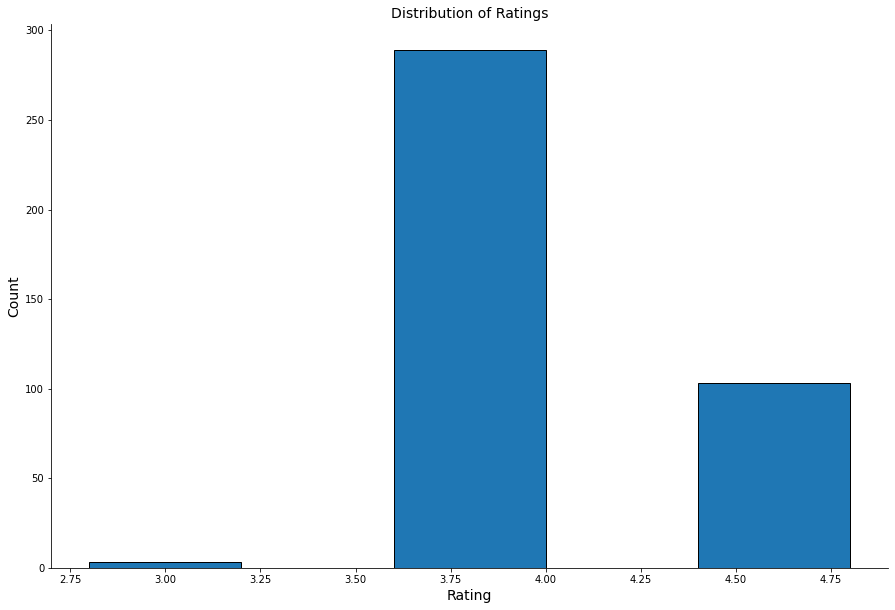

In [29]:
plt.figure(figsize=(15,10))
plt.hist(concat.Rating, align='left', bins=5, edgecolor='k')
sns.despine()
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=14), plt.ylabel('Count', fontsize=14)
plt.show()

4.253164556962025


<AxesSubplot:>

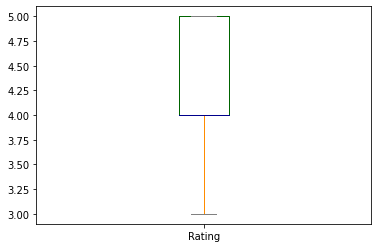

In [30]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
    }
print(concat["Rating"].mean())
concat['Rating'].plot.box(color=color)

4.5139181286549706


<AxesSubplot:>

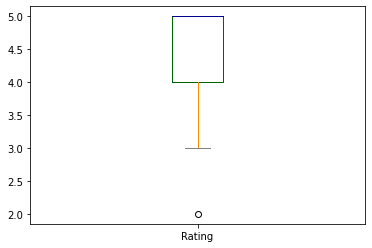

In [31]:
print(temp["Rating"].mean())
temp['Rating'].plot.box(color=color)

In [32]:
print(concat["price"].mean())
#temp['price'] = temp['price'].str[:5]
temp['price'] = temp['price'].str[:5]
temp['price'] = temp['price'].replace(',','', regex=True)
temp['price'] = temp['price'].astype(float)
print(temp["price"].mean())


23.541215189873416
20.26381403508772


395
8550


<AxesSubplot:>

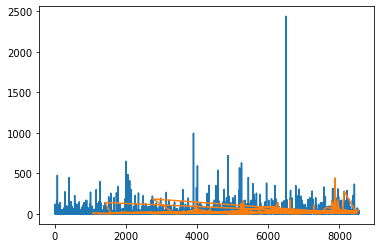

In [33]:
cMean = concat["price"].mean()
print(concat.shape[0])
tMean = temp["price"].mean()
print(temp.shape[0])
ax = temp["price"].plot()
concat["price"].plot(ax=ax)


23.541215189873416


<AxesSubplot:>

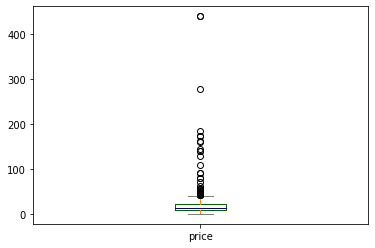

In [34]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
    }
print(concat["price"].mean())
concat['price'].plot.box(color=color)

20.26381403508772


<AxesSubplot:>

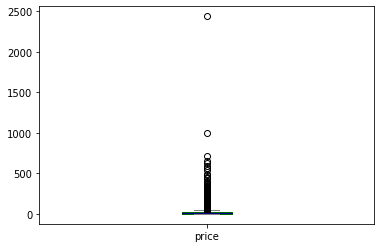

In [35]:
print(temp["price"].mean())
temp['price'].plot.box(color=color)

In [36]:
under3 = temp[temp['Rating'] < 3.1]
under3

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
81,Large Inflatable Santa Clause / Father Christm...,Inflatable Santa,5.99,2,NaN,3.0 out of 5 stars,Party Supplies > Decorations > Props,This cheeky inflatable Santa / Father Christma...,Technical Details Manufacturer recommended age...,This cheeky inflatable Santa / Father Christma...,Five Stars // 5.0 // 16 Dec. 2015 // By\n \...,1.000000,5,3,0
3073,4 Block Hay Bales - 02342,Bruder,5.61,7,5.0,3.9 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Product Description Get farming with this love...,Technical Details Item Weight145 g Product Dim...,Product Description Get farming with this love...,Five Stars // 5.0 // 12 Sept. 2014 // By\n ...,0.455556,5,3,0
5001,Leg Avenue Dead Eye Dolly Fancy Dress Costume,Leg Avenue,32.99,3,2.0,3.7 out of 5 stars,Fancy Dress > Costumes > Adults,The fear of dolls is known as pediophobia and ...,NaN,The fear of dolls is known as pediophobia and ...,One Star // 1.0 // 22 Jan. 2016 // By\n \n ...,0.325000,5,3,0
5604,Crayola 8-Ultra Clean Marker Stampers,Crayola,3.79,5,1.0,3.6 out of 5 stars,Characters & Brands > Crayola,Product Description Express Yourself with Mark...,Technical Details Item Weight100 g Product Dim...,Product Description Express Yourself with Mark...,Are they ultra clean because they have no ink ...,0.290333,5,3,0
5774,Mickey Mouse Inflatable Character 52cm,Tapball,2.38,42,1.0,3.9 out of 5 stars,Sports Toys & Outdoor > Beach Toys > Paddling ...,Inflatable Mickey Character Height : 52 cm,Technical Details Item Weight390 g Product Dim...,Inflatable Mickey Character Height : 52 cm,Inflatable Mickey Mouse // 5.0 // 16 Feb. 2015...,0.279799,5,3,0
6198,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,0.254530,5,3,0
6447,Tayo the Little Bus - Met the Subway Train,TAYO,32.70,4,1.0,3.5 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,Tayo the Little Bus - Met the Subway Train Sub...,Technical Details Item Weight635 g Product Dim...,Tayo the Little Bus - Met the Subway Train Sub...,I think it is overpriced. Had I seem the ... /...,0.241667,5,3,0
7095,Monopoly Deal Card Game (US Version),Hasbro,4.75,5,1.0,3.6 out of 5 stars,Characters & Brands > Hasbro,Get a handy way to play the classic property-t...,Technical Details Item Weight213 g Product Dim...,Get a handy way to play the classic property-t...,"Monopoly is a great game, but this set is not ...",0.196465,5,3,0
7872,Parrot Bebop Drone 2 (White),Parrot,439.90,9,3.0,3.3 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,Much improved but slightly weird incremental u...,0.110179,4,3,0
7989,"WowWee ""Robosapien X"" Controller with Dongle",Wow Wee,75.99,8,1.0,3.5 out of 5 stars,Electronic Toys > Robots,Product Description Robosapien X is an excitin...,Technical Details Item Weight2.1 Kg Product Di...,Product Description Robosapien X is an excitin...,Unless you have time and money to waste think ...,0.083106,3,3,0


In [37]:
df4 = new.groupby(['manufacturer'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=True).head(10)
df4.style.background_gradient(cmap="autumn", subset=['Rating'])

,manufacturer,Rating
1847,Super Mario,3.000000
1966,The Original Glowstars,3.000000
2218,Wow Wee,3.000000
159,BINGWAN,3.000000
1865,TAYO,3.000000
2268,ccf,3.000000
973,Inflatable Santa,3.000000
368,Cavendish Trading,3.000000
1025,John Adams,3.750000
1158,Lite Brix Moonlight Monsters,4.000000


In [38]:
df4 = new.groupby(['manufacturer'],as_index=False).agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False).head(936)
df4.style.background_gradient(cmap="autumn", subset=['Rating'])

,manufacturer,Rating
2357,|MFG,5.000000
788,Gleader,5.000000
768,Gemz Fancy Dress,5.000000
771,GeoSpace,5.000000
1684,SK Japan,5.000000
773,Ghostbusters,5.000000
1683,SJ R/C,5.000000
1682,SIMBA - DICKIE,5.000000
1680,SGM,5.000000
1679,SF801329TT,5.000000


In [58]:
expensive = temp.sort_values(by='price', ascending=False)
expensive.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
6494,Bowen Designs - Marvel Statue Thor Classic Act...,Bowen Designs,2439.0,1,1.0,4.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Access...,Sideshow Collectibles is proud to present the ...,Technical Details Item Weight6 Kg Product Dime...,Sideshow Collectibles is proud to present the ...,Thortastic... // 4.0 // 12 Sept. 2012 // By\n ...,0.237608,5,4,0
3899,DJI Phantom 2 with H3-3D Gimbal,DJI,995.1,4,19.0,5.0 out of 5 stars,Hobbies > Remote Controlled Devices > Helicopt...,Product Description Including the H3-3D Gimbal...,Technical Details Item Weight2.5 Kg Product Di...,Product Description Including the H3-3D Gimbal...,Dji // 5.0 // 24 Aug. 2014 // By\n \n ol...,0.398235,5,5,0
4869,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.9,1,1.0,5.0 out of 5 stars,Figures & Playsets > Science Fiction & Fantasy,Figurine articulée taille env. 30 cm avec vête...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulée taille env. 30 cm avec vête...,"""It's not the years, sweet heart, it's the mil...",0.332950,5,5,0
1999,Autoart 70206 - Aston Martin V12 Vantage - 201...,AUTOart,648.9,1,1.0,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,AUTOART ASTON MARTIN V12 VANTAGE 2010 SILVER W...,Technical Details Item Weight50 g Product Dime...,AUTOART ASTON MARTIN V12 VANTAGE 2010 SILVER W...,Prompt delivery of this beautiful product in s...,0.550000,5,5,0
5248,Weiss Schwarz Extra Booster Clannad Vol.3,Bushiroad,629.9,1,2.0,5.0 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,Weiss Schwarz Extra Booster CLANNAD vol.03 BOX,Technical Details Item Weight104 g Product Dim...,Weiss Schwarz Extra Booster CLANNAD vol.03 BOX,Beautiful but expensive collection // 5.0 // 2...,0.311111,5,5,0


In [59]:
cheap = temp.sort_values(by='price', ascending=True)
cheap.head()

,product_name,manufacturer,price,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,customer_reviews,sentiment,Prediction,Rating,check
1118,Happy 18th Birthday Foil Banner - 365cm,Partyrama,0.01,1,1.0,5.0 out of 5 stars,"Party Supplies > Banners, Stickers & Confetti ...",Happy 18th Birthday Foil Banner - Sold Single....,Technical Details Manufacturer recommended age...,Happy 18th Birthday Foil Banner - Sold Single....,Five Stars // 5.0 // 22 Nov. 2014 // By\n \...,0.700000,5,5,0
6725,Dinosaur Eggs,Halsall,0.29,3,2.0,4.0 out of 5 stars,Figures & Playsets > Dinosaurs,nan,Technical Details Item Weight82 g Product Dime...,NaN,Fascinating fun // 4.0 // 25 Nov. 2008 // By\n...,0.222115,5,4,0
1263,1 x GOLD Interlocking Wedding Rings Peel off S...,Just Feathers by Crazy Grans,0.37,2,1.0,5.0 out of 5 stars,Arts & Crafts > Paper & Stickers,1 sheet of peel off stickers Can be used on pa...,Technical Details Manufacturer recommended age...,1 sheet of peel off stickers Can be used on pa...,These were perfect // 5.0 // 25 Nov. 2013 // B...,0.652500,5,5,0
6511,Neopets 4 Trading Card Fun Packs (2 Bonus Cards),Neopets,0.38,2,1.0,4.5 out of 5 stars,Hobbies > Trading Cards & Accessories > Packs ...,nan,Technical Details Item Weight454 g Product Dim...,NaN,Never Too Old // 4.0 // 6 Nov. 2013 // By\n ...,0.236747,5,4,0
3881,"Latex Assorted Water Balloons, Pack of 40",Unique Party,0.39,2,1.0,4.5 out of 5 stars,Party Supplies > Decorations > Balloons,Colour Name:Assorted Bold | Size Name:Pack o...,Technical Details Item Weight222 g Product Dim...,Colour Name:Assorted Bold | Size Name:Pack o...,Great item // 4.0 // 27 Dec. 2015 // By\n \...,0.400000,5,4,0
